# Rekursion

#### Setup der Bibliotheken in Jupyter

Turtle Grafik gehört nicht zum Standardumfang der Java Programmiersprache. Die Funktionalität die wir hier nutzen wird von einer externen *Bibliothek* zur Verfügung gestellt. Java und die Jupyter-Notebook Umgebung wissen zunächst mal nichts von dieser Bibliothek. Damit wir die Befehle in dieser Bibliothek verwenden können, müssen wir Sie zuerst im Jupyter-Notebook zur Verfügung stellen. Dies geschieht mit den folgenden Befehlen:

In [6]:
%mavenRepo shapemodelling-repo https://shapemodelling.cs.unibas.ch/repo/
%maven ch.unibas.informatik:jturtle:0.7

In [7]:
import static ch.unibas.informatik.jturtle.TurtleCommands.*

# Schleifen

Das nächste wichtige Konstrukt im Programmieren sind die Schleifen. Damit lassen sich Befehle beliebig oft wiederholen. 

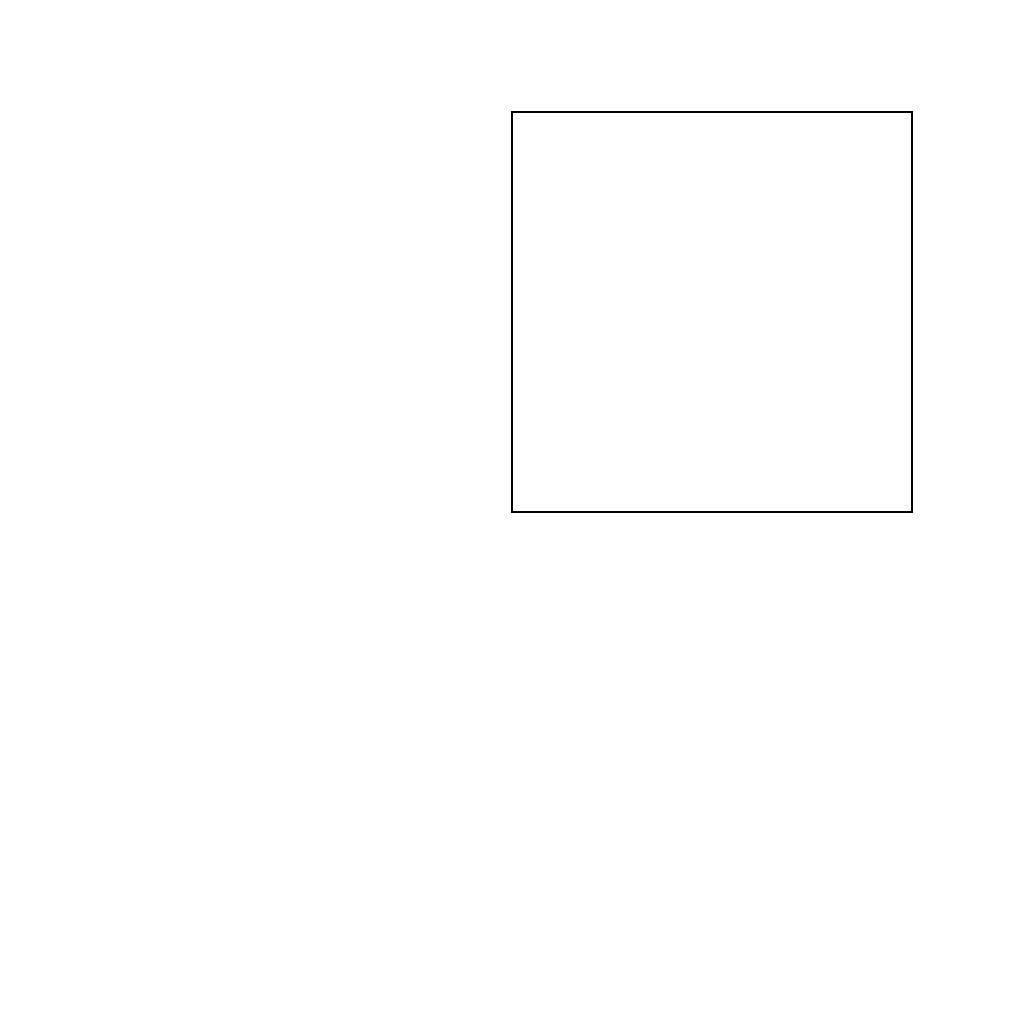

In [10]:
class RegularPolygon {

    public static void draw(int n) {
        int sideLength = 80;
        penDown();
        for (int i = 0; i < 4; i++) {
            forward( sideLength );
            turnRight(90);
        }
    }
    
    public static void main(String[] args) {
        clear();
        home();
        draw(5);
        display(drawing());
    }
}
RegularPolygon.main(new String[0]);

### Miniübungen

* Ergänzen Sie den Code, so dass ein n-eck gezeichnet werden kann
* Nutzen Sie alle drei Arten von Schleifen, welche ist am geeignetsten?
* Zeichnen Sie eine Spirale. Welche Schleife nehemn Sie jetzt?

## Rekursion

Ein klassisches Beispiel von rekursiv definierten Folgen ist die Fibonaccifolge:

$
f_0 = 0 \\
f_1 = 1 \\
f_n = f_{n -1} + f_{n - 2}
$

Auch die Implementation dieser Funktion folgt genau der Struktur der mathematischen Definition. Der Unterschied ist in diesem Fall nur, dass 
wir hier zwei Fälle haben, in den wir die Rekursion abbrechen.

#### Miniübung:

* Implementieren Sie die Fibonnaccifolge Rekursiv und Iterativ (also mit einer Schleife). 
* Geben Sie die ersten 20 Elemente der Fibonaccifolge aus.


In [3]:
class Fibonacci { 
    static int computeFibonacciRec(int n) {
        if (n == 0 ) { 
            return 0;
        }
        if (n  == 1) {
            return 1;
        }
        return computeFibonacciRec(n - 1) + computeFibonacciRec(n -2);
    }
    
    public static void main(String[] args) {
        System.out.println(computeFibonacciRec(7));
    }
}
Fibonacci.main(new String[0]);

13


Rekursion lässt sich auch bestens mit Turtlegrafik veranschaulichen. Ein berühmtes Beispiel einer Rekursiven Funktion ist das Sierpinski Dreieck. Dabei werden in jedem Dreieck wieder 3 kleinere Dreiecke gezeichnet. Wir brechen ab, wenn wir eine bestimmte Rekursionstiefe erreicht haben. 

In [5]:
class Drawing {
    static void drawSierpinski(double length, int depth) {
        if (depth==0){
            for (int i = 0; i < 3; i++) {
                forward(length);
                turnLeft(120);
            }
        }
        else {
            drawSierpinski(length/2.0 , depth-1);
            forward(length/2);
            drawSierpinski(length/2.0,depth-1);
            backward(length/2);
            turnLeft(60);
            forward(length/2);
            turnRight(60);
            drawSierpinski(length/2.0,depth-1);
            turnLeft(60);
            backward(length/2);
            turnRight(60);
        }
    }
}

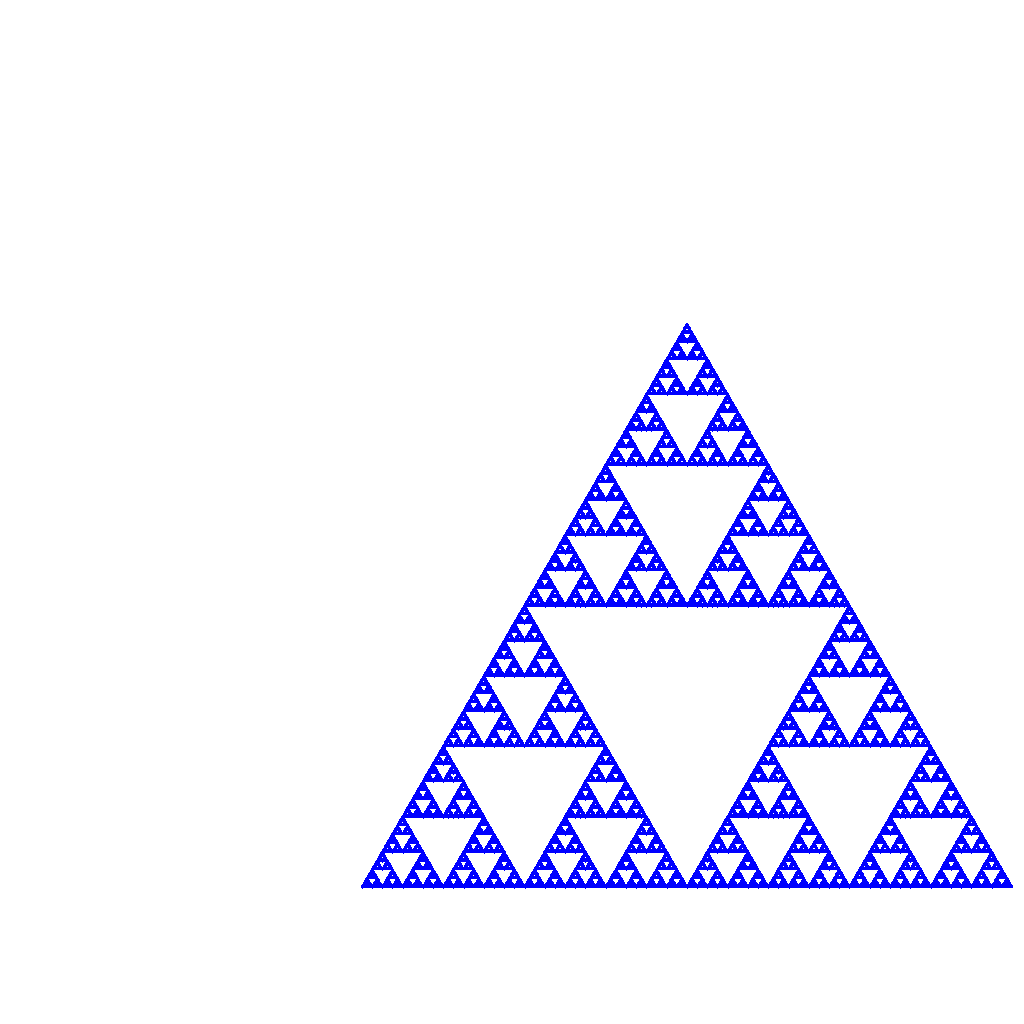

33f41720-f213-426e-9125-2b97f520bf8c

In [26]:
home();
clear();
penUp();
goTo(-30, -75);
turnRight(90);
penDown();
Drawing.drawSierpinski(130, 10);
display(drawing());

#### Miniübung:

* Schauen Sie wie die Zeichnung aufgebaut ist indem Sie die Methode für depth 0, 1, 2, ... ausführen.

### Drachenkurve

Methoden können nicht nur sich selbst, sondern auch andere Methoden aufrufen, die wiederum die erste Funktion aufruft. Ein Beispiel von einem solchen Rekurssionsschema wird beim Zeichnen einer Drachenkurve benutzt. Hier ruft die Methode ```f1``` die Methode ```f2``` auf, die wiederum die Methode ```f1``` aufruft. 

In [25]:
class DragonCurve {
  
    static void f1(int depth, double length) {
        penColor(GREEN);
        if (depth <= 0) {
            forward(length);
            return;
        } else {
            f1(depth - 1, length * Math.sqrt(0.5));
            turnRight(90);  
            f2(depth - 1, length * Math.sqrt(0.5));
        }
    }
    static void f2(int depth, double length) {
        penColor(BLUE);
        if (depth <= 0) {
            forward(length);
            return;
        } else {
            f1(depth - 1, length * Math.sqrt(0.5));
            turnLeft(90);  
            f2(depth -1, length * Math.sqrt(0.5));
        }
    }
}

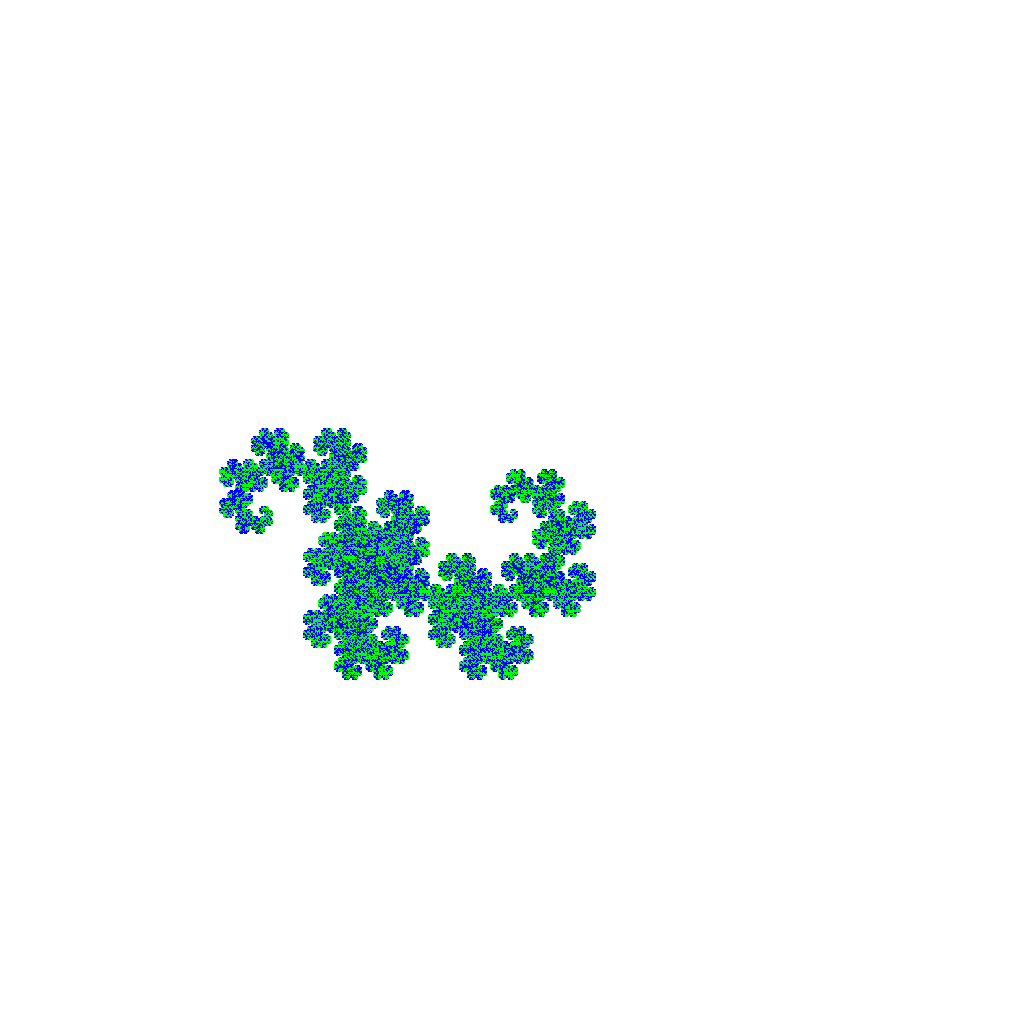

c3724b9f-cedf-4628-beb4-7eadcfcc34a5

In [24]:
home();
clear();
penUp();
goTo(0, 0);
turnRight(90);
penDown();
DragonCurve.f1(20, 50);
display(drawing());

### Miniübung

* Setzen Sie die Stiftfarbe unterschiedlich in beiden Methoden um herauszufinden, was von welcher Methode gezeichnet wird. 
    * Erkennen Sie ein Muster?